In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
K = 10
TRIALS = 1000
MEAN_STDDEV = 10
SAMPLE_STDDEV = 10
MEANS = np.random.normal(0, MEAN_STDDEV, 10)
DATA = np.array([np.random.normal(mu, SAMPLE_STDDEV, 1000) for mu in MEANS])
COUNTS = [0] * K

In [80]:
print(MEANS)
print(np.mean(DATA, axis=1))

[-2.48687763 -7.54725396 -0.69300207  6.5018963  -9.90518422 -5.63041178
 15.53042311 -7.93600615  0.3442702  -4.35546146]
[-3.02214865 -7.66293966 -0.8996755   6.95633057 -9.9464563  -5.54921388
 15.36011756 -7.94672531  0.18362021 -4.16769572]


In [81]:
class Env:
    def __init__(self, data, step=0):
        self.data = data
        self.length = data.shape[1]
        self.step = step

class Bandit:
    def __init__(self, k, epsilon, env):
        self.k = k
        self.epsilon = epsilon
        self.env = env
        self.counts = k*[0]
        self.estimates = k*[0]
        self.reward = 0
        self.avg = env.length * [0]
    
    def act(self):
        x = np.random.random()
        if x > self.epsilon:
            index = np.argmax(self.estimates)
        else:
            index = np.random.randint(0, self.k)

        x = self.env.data[index, self.env.step]
        n = self.counts[index]
        mean = self.estimates[index]
        self.counts[index] += 1
        self.estimates[index] = (n*mean+x)/(n+1)
        self.reward += x
        if self.env.step == 0:
            self.avg[self.env.step] = x
        else:
            self.avg[self.env.step] = (self.env.length*self.avg[self.env.step-1] + x)/(self.env.step+1)
        self.env.step += 1
        
    def reset(self):
        self.counts = self.k*[0]
        self.estimates = self.k*[0]
        self.reward = 0
        self.avg = self.env.length * [0]
        self.env.step = 0
        
    def run(self):
        for i in range(self.env.length):
            self.act()
        return self.reward

[-8.846496699185604, -8.853608416683803, -8.849914841139526, -8.85148222397278, -8.836605459569077, -8.810661105526682, -8.803901206166213, -8.789519546717706, -8.773827726500366, -8.75793843115267, -8.744065859791746, -8.724236046443906, -8.695565047185926, -8.6979435893754, -8.675314192414133, -8.655611287185936, -8.664126079214064, -8.649213911519528, -8.638729598802747, -8.627753016566698, -8.612343733827494, -8.599775955199446, -8.58074150920874, -8.564540515354631, -8.547857975957976, -8.523282814797856, -8.51428682206677, -8.495879157676857, -8.472782798506891, -8.469431854202718, -8.452432488289215, -8.435076111338974, -8.423101274111415, -8.418757177893676, -8.435549591844467, -8.419660899309555, -8.415471753196782, -8.39878351956986, -8.369763142843341, -8.349146317031801, -8.324860663282703, -8.345037240181574, -8.3351101492069, -8.319302645360503, -8.319155376792892, -8.290633120827023, -8.268447551372567, -8.24408566271315, -8.225745036982662, -8.236485160192093, -8.215101

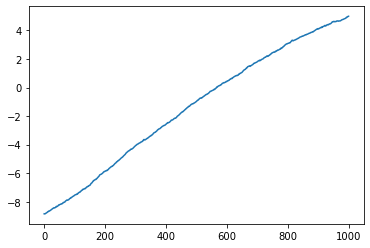

In [87]:
env = Env(DATA)
bandit = Bandit(K, 0.1, env)
bandit.run()
print(bandit.avg)
print(np.mean(env.data, axis = 1))
print(bandit.reward / 1000)
print(bandit.estimates)
plt.plot(bandit.avg)
bandit.reset()